# Sequence Alignment
Sequence alignment is a method of arranging sequences of DNA, RNA, or Amino Acids or proteins to identify regions of similarity.
The similarity being identified, may be a result of functional, structural, or evolutionary relationships between the sequences.
It is useful in identifying similarity and homology
Homology: descent from a common ancestor or source.
Terms:
- Matches
- Mismatches
- Gap

In [7]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import Bio

In [9]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [10]:
dna_seq1 = Seq("TCACTCGT")
dna_seq2 = Seq("ATTCG")

In [11]:
# perform global alignment
global_allign = pairwise2.align.globalxx(dna_seq1, dna_seq2)
print(global_allign)

[Alignment(seqA='TCACT-CGT', seqB='--A-TTCG-', score=4.0, start=0, end=9), Alignment(seqA='TCAC-TCGT', seqB='--A-TTCG-', score=4.0, start=0, end=9), Alignment(seqA='TCACTCGT', seqB='--ATTCG-', score=4.0, start=0, end=8), Alignment(seqA='-TCACTCGT', seqB='AT---TCG-', score=4.0, start=0, end=9)]


In [12]:
# display the alignment
print(format_alignment(*global_allign[0]))

TCACT-CGT
  | | || 
--A-TTCG-
  Score=4



In [13]:
# View all possible alignment
for alignment in global_allign:
    print(format_alignment(*alignment))

TCACT-CGT
  | | || 
--A-TTCG-
  Score=4

TCAC-TCGT
  |  ||| 
--A-TTCG-
  Score=4

TCACTCGT
  |.||| 
--ATTCG-
  Score=4

-TCACTCGT
 |   ||| 
AT---TCG-
  Score=4



In [14]:
# Perform Local Alignment
local_align = pairwise2.align.localxx(dna_seq1, dna_seq2)
print(local_align)

[Alignment(seqA='TCACT-CGT', seqB='--A-TTCG-', score=4.0, start=2, end=8), Alignment(seqA='TCAC-TCGT', seqB='--A-TTCG-', score=4.0, start=2, end=8), Alignment(seqA='TCACTCGT', seqB='--ATTCG-', score=4.0, start=2, end=7), Alignment(seqA='-TCACTCGT', seqB='AT---TCG-', score=4.0, start=1, end=8)]


In [15]:
# view all possible alignment
for alignment in local_align:
    print(format_alignment(*alignment))
    

3 ACT-CG
  | | ||
1 A-TTCG
  Score=4

3 AC-TCG
  |  |||
1 A-TTCG
  Score=4

3 ACTCG
  |.|||
1 ATTCG
  Score=4

1 TCACTCG
  |   |||
2 T---TCG
  Score=4



In [16]:
# Get the local alignment by only the score
local_score = pairwise2.align.localxx(dna_seq1, dna_seq2, score_only = True)
print(local_score)

4.0


In [17]:
global_score = pairwise2.align.globalxx(dna_seq1, dna_seq2, score_only = True)
print(global_score)

4.0


Check for similarity or percentage of similarity using Alignment
fraction of nucleotides that is the same/total number of nucleotides * 100%

In [18]:
# calculate the global alignment percentage of similarity
global_percent = global_score / len(dna_seq1) * 100
global_percent

50.0

In [19]:
local_percent = local_score/len(dna_seq1)*100
local_percent

50.0

# Global Alignments with Maximum Similarity Score

Find out all possible global alignment with the maximum similarity score
- match = 2
- mismatch = -1
- open gap = -0.5
- extend gap = -0.1

In [20]:
# performs global alignment with max similarity score
# globalms(seqA, seqB, match, mismatch, gap, extend)

# Perform global alignment with max similarity score
alignments = pairwise2.align.globalms(dna_seq1, dna_seq2, 2, -1, -0.5, -0.1)

# Print each alignment
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))

-TCACTCGT
 |   ||| 
AT---TCG-
  Score=6.3



# Similarity Between Sequences

In [21]:
# create 3 example sequences

seqA = Seq("AAGGCTT")
seqB = Seq("AAGGC")
seqC = Seq("AAGGCAT")

In [22]:
# calculate local alignment and get the scores

scoreAB = pairwise2.align.localxx(seqA, seqB, score_only = True)
scoreBC = pairwise2.align.localxx(seqB, seqC, score_only = True)
scoreAC = pairwise2.align.localxx(seqA, seqC, score_only = True)

In [23]:
# calculate percentage of similarity and print
print(scoreAB/len(seqB)*100)
print(scoreBC/len(seqB)*100)
print(scoreAC/len(seqA)*100)

100.0
100.0
85.71428571428571


In [24]:
seqA == seqB

False

# Hamming distance
shows how many places 2 strings offer
number of positions at which the corresponding symbols are different

In [25]:
# create example sequences
sequence1 = Seq("ACTAT")
sequence2 = Seq("ACTTA")
sequence3 = Seq("ACTT")

In [26]:
# defining hamming distance function
def hamming(seqa, seqb):
        mismatchlist = [(x,y) for (x,y) in zip(seqa, seqb) if x != y]
        return len(mismatchlist)

In [27]:
# perform hamming distance calculation. hamming ngitung yang punya pasangan
hamming(sequence1, sequence2)

2

# Levenshtein Distance

it works on strings with unequal length

The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target).

In [28]:
%pip install Levenshtein

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
from Levenshtein import distance

In [30]:
distance(sequence1, sequence2)

2

# Dot Plot

In [31]:
# define delta function
def delta(x,y):
    return 0 if x == y else 1

In [32]:
# define M function
def M(seq1, seq2, i, j, k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k], seq2[j:j + k]))

In [33]:
# define makeMatrix function
def makeMatrix(seq1, seq2, k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1, seq2, i, j, k) for j in range(m-k+1)] for i in range(n-k+1)]

In [34]:
# create 2 DNA sequence examples
seq_X = Seq("ACCTGAGCTCACCTGAGTTA")
seq_Y = Seq("ACCTGAGCTCACCTGAGTTA")

In [35]:
# import numpy & matplotlib libraries to calculate & plot the result
import numpy as np
from matplotlib import pyplot as plt

In [36]:
# create a function to disploay dotplot using matplotlib
def FancyDotPlot(seqx, seqy):
    plt.imshow(np.array(makeMatrix(seqx,seqy, 1)))
    plt.xticks(np.arange(len(seqy)), seqy)
    plt.yticks(np.arange(len(seqx)), seqx)
    plt.show()


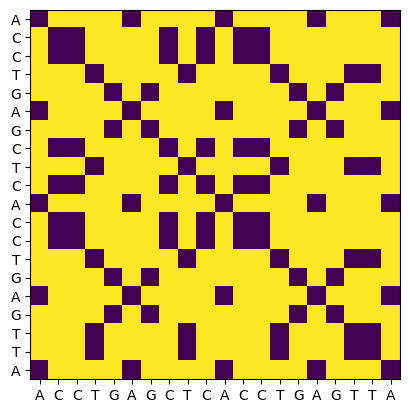

In [37]:
# call the function
FancyDotPlot(seq_X, seq_Y)

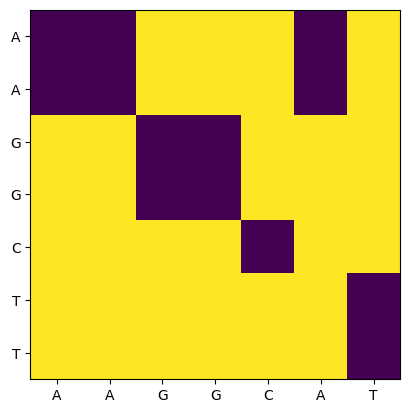

In [38]:
FancyDotPlot(seqA, seqC)

create and displaying dotplot using ASCII characters

In [39]:
# define plotMatrix function
def plotMatrix(Mat, t, seq1, seq2, nonblank = chr(0x25A0) , blank = ' '):
    print(' |' + seq2)
    print('-' * (2 + len(seq2)))

    for label, row in zip(seq1, Mat):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

In [40]:
def dotplot(seq1, seq2, k = 1, t = 1):
    Mat = makeMatrix(seq1, seq2, k)
    plotMatrix(Mat, t, seq1, seq2)

In [41]:
dotplot(seq_X, seq_Y)

 |ACCTGAGCTCACCTGAGTTA
----------------------
A|■    ■    ■    ■   ■
C| ■■    ■ ■ ■■       
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
G|    ■ ■       ■ ■   
A|■    ■    ■    ■   ■
G|    ■ ■       ■ ■   
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
C| ■■    ■ ■ ■■       
A|■    ■    ■    ■   ■
C| ■■    ■ ■ ■■       
C| ■■    ■ ■ ■■       
T|   ■    ■    ■   ■■ 
G|    ■ ■       ■ ■   
A|■    ■    ■    ■   ■
G|    ■ ■       ■ ■   
T|   ■    ■    ■   ■■ 
T|   ■    ■    ■   ■■ 
A|■    ■    ■    ■   ■
